In [1]:
import import_ipynb
from imutils import paths
import matplotlib.pyplot as plt
from skimage import feature
import numpy as np
import cv2
import os
import glob

In [2]:
# Loading clean faces dataset
def chargerFaces(inputPath):
    imagePaths = list(paths.list_images(inputPath))
    names = [p.split(os.path.sep)[-1] for p in imagePaths]
    (names , counts) = np.unique(names , return_counts = True)
    names = names.tolist()

    faces = []
    labels = []
    
    for imagePath in imagePaths:
        image = cv2.imread(imagePath)
        name = imagePath.split(os.path.sep)[-1]
        
        faces.append(image)
        labels.append(name.split(" ")[0])
    
    faces = np.array(faces)
    labels = np.array(labels)
    
    return (faces , labels)   

In [3]:
faces, labels = chargerFaces('FacesDB')

In [4]:
print(type(faces))
print(faces.shape)
print(len(faces))
print(faces[0].shape)

<class 'numpy.ndarray'>
(209, 100, 100, 3)
209
(100, 100, 3)


Aguerd


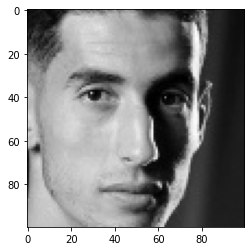

In [5]:
plt.imshow(faces[0], cmap='gray')
print(labels[0])

In [6]:
class LocalBinaryPatterns:
    def __init__(self , numPoints , radius):
        self.numPoints = numPoints
        self.radius = radius

    def describe(self , image , eps=1e-7):
        lbp = feature.local_binary_pattern(image , self.numPoints , self.radius)
        hist = plt.hist(lbp.ravel())
        return lbp , hist

In [7]:
def LBPFace(image):
    img = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
    lbp , hist = desc.describe(img)
    return lbp , hist

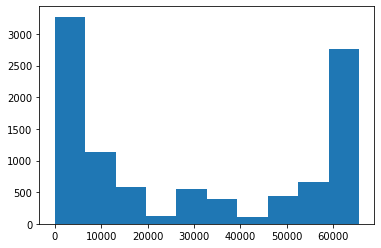

In [8]:
desc = LocalBinaryPatterns(16, 5)
lbp, hist = LBPFace(faces[0])

Aguerd


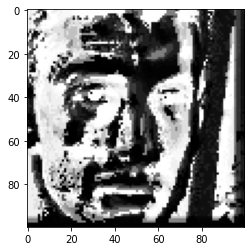

In [9]:
plt.imshow(lbp, cmap='gray')
print(labels[0])

In [10]:
def LBPFaceList(Faces):
    lbpList = []
    for i in range(len(Faces)):
        lbp, _ = LBPFace(Faces[i])
        lbpList.append(lbp)
    lbpList = np.array(lbpList)
    return lbpList

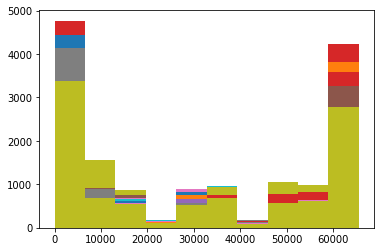

In [12]:
lbpList = LBPFaceList(faces)

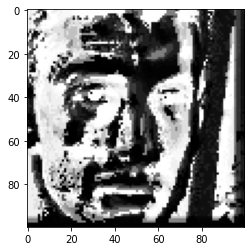

In [13]:
plt.imshow(lbpList[0], cmap='gray')

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import keras

In [23]:
# encode the labels
le = LabelEncoder()
labels = le.fit_transform(labels)

# split the data into training and test set
X_train , X_test , y_train , y_test = train_test_split(lbpList , labels , test_size = 0.25,
                                                      stratify = labels , random_state = 42, shuffle= True)
X_train = np.array(X_train) / 255
X_test = np.array(X_test) / 255

x_train_flattened = X_train.reshape(len(X_train), 100*100)
x_test_flattened = X_test.reshape(len(X_test), 100*100)
    
# define and train the LBP model
model=keras.Sequential([
    keras.layers.Dense(120,input_shape=(10000,),activation='sigmoid'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=50)

# Make predictions
testPredictions = model.evaluate(x_test_flattened,y_test)
trainPredictions = model.evaluate(x_train_flattened,y_train) 
print("Test score : " + str(testPredictions))
print("Train score : " + str(trainPredictions))

Epoch 1/50
5/5 [==============================] - 6s 17ms/step - loss: 2.5627 - accuracy: 0.1667
Epoch 2/50
5/5 [==============================] - 0s 17ms/step - loss: 2.3436 - accuracy: 0.1282
Epoch 3/50
5/5 [==============================] - 0s 19ms/step - loss: 2.2196 - accuracy: 0.1410
Epoch 4/50
5/5 [==============================] - 0s 18ms/step - loss: 2.1387 - accuracy: 0.2051
Epoch 5/50
5/5 [==============================] - 0s 19ms/step - loss: 2.1120 - accuracy: 0.1474
Epoch 6/50
5/5 [==============================] - 0s 19ms/step - loss: 2.0801 - accuracy: 0.1987
Epoch 7/50
5/5 [==============================] - 0s 20ms/step - loss: 2.0682 - accuracy: 0.1731
Epoch 8/50
5/5 [==============================] - 0s 22ms/step - loss: 2.0559 - accuracy: 0.1731
Epoch 9/50
5/5 [==============================] - 0s 19ms/step - loss: 2.0494 - accuracy: 0.1731
Epoch 10/50
5/5 [==============================] - 0s 20ms/step - loss: 2.0460 - accuracy: 0.1987
Epoch 11/50
5/5 [============